In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.regularizers import l2  # Import L2 regularization
import pandas as pd
# Load the dataset
Data = pd.read_csv('DualBypass.csv')

In [2]:
Data.head()

,BPR1,BPR2,PR_HPC,PR_IPC,PR_LPC,TIT,TSCOR,TSF,TSFC,TSNoxR,SFC
0,0.2059,0.2059,5.891,4.540,4.202,2021,0.03402,118.5,99.97,0.1805,0.1200
1,0.2058,0.2058,5.890,4.539,4.201,2021,0.03397,118.9,99.71,0.1800,0.1196
2,0.0500,0.5707,8.253,2.000,7.505,2194,0.02799,124.8,99.94,0.1795,0.1199
3,0.2058,0.2058,5.888,4.538,4.201,2021,0.03392,119.2,99.44,0.1795,0.1193
4,0.2057,0.2057,5.887,4.537,4.200,2021,0.03387,119.6,99.18,0.1791,0.1190


In [3]:
import numpy as np

# Assuming Data is your dataset

# Generate synthetic data with 50 points
X = Data[['BPR1', 'BPR2', 'PR_HPC', 'PR_IPC', 'PR_LPC', 'TIT']].values

# Filter out bad data for TSFC, TSNoxR, and SFC
mask = np.all(np.isfinite(Data[['TSFC', 'TSNoxR', 'SFC']].values), axis=1)
y = Data[mask][['TSCOR', 'TSF', 'TSFC', 'TSNoxR', 'SFC']].values

In [4]:

# Clean X by removing rows with bad data
X = X[mask]

# Clean y by removing rows with bad data
y = y[mask]

In [5]:

# Normalize the input and output variables
scaler_x = StandardScaler()
inputs_norm = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
outputs_norm = scaler_y.fit_transform(y)



In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_norm, outputs_norm, test_size=0.2, random_state=20)


In [7]:

from keras.optimizers import Adam
#500 300 200 epoch=100 #random state 20

# Define the Multi-Output MLP Regressor model with Dropout and L2 regularization
model_regularized_dropout = Sequential()
model_regularized_dropout.add(Dense(150
                                    ,input_dim=X.shape[1], activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(100
                                    , activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(50
                                    ,activation='relu'))  # LSM

model_regularized_dropout.add(Dense(5))  # Output layer with 2 units for two target variables


D:\anaconda-3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compile the model with mean squared error loss and Adam optimizer with custom learning rate
adam = Adam(learning_rate=1e-4)

model_regularized_dropout.compile(loss='mean_squared_error', optimizer=adam)

# Train the model with Dropout and L2 regularization
history_cc=model_regularized_dropout.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test),
                              batch_size=32, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

Epoch 1/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9033 - val_loss: 0.6458
Epoch 2/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5630 - val_loss: 0.3840
Epoch 3/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3678 - val_loss: 0.2752
Epoch 4/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2486 - val_loss: 0.2193
Epoch 5/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2116 - val_loss: 0.1747
Epoch 6/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1775 - val_loss: 0.1487
Epoch 7/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1572 - val_loss: 0.1330
Epoch 8/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1319 - val_loss: 0.1223
Epoch 9/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1224 - val_loss: 0.1116
Epoch 10/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1101 - val_loss: 0.1000
Epoch 11/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1004 - val_loss: 0.0902
Epoch 12/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 70/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 71/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 72/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 73/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 74/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 75/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 76/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 77/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 78/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 79/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 80/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4468e-04 - val_loss: 5.8454e-04
Epoch 136/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4166e-04 - val_loss: 6.3322e-04
Epoch 137/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8742e-04 - val_loss: 4.7936e-04
Epoch 138/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5058e-04 - val_loss: 7.6460e-04
Epoch 139/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6086e-04 - val_loss: 6.0916e-04
Epoch 140/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4690e-04 - val_loss: 5.0758e-04
Epoch 141/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2988e-04 - val_loss: 5.7049e-04
Epoch 142/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8219e-04 - val_loss: 9.1460e-04
Epoch 143/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7261e-04 - val_loss: 5.2831e-04
Epoch 144/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4749e-04 - val_loss: 9.2661e-04
Epoch 145/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2994e-04 - val_loss: 4.6038e-04
Epoch 199/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4645e-04 - val_loss: 6.3614e-04
Epoch 200/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8800e-04 - val_loss: 7.0165e-04
Epoch 201/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1742e-04 - val_loss: 1.8574e-04
Epoch 202/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9118e-04 - val_loss: 2.1855e-04
Epoch 203/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2777e-04 - val_loss: 3.8003e-04
Epoch 204/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8047e-04 - val_loss: 3.4519e-04
Epoch 205/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1667e-04 - val_loss: 3.1904e-04
Epoch 206/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5451e-04 - val_loss: 2.9982e-04
Epoch 207/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8053e-04 - val_loss: 2.3160e-04
Epoch 208/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7

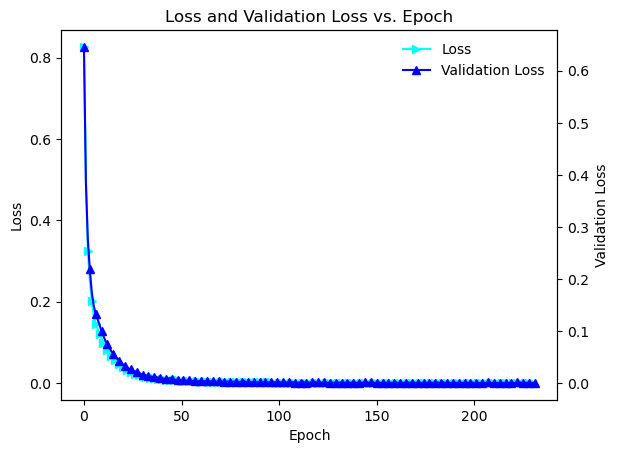

In [9]:
import matplotlib.pyplot as plt 

# Plot the validation loss vs. epoch
fig, ax1 = plt.subplots()
# Dataset 1
ax1.plot(history_cc.history['loss'], marker='>', label='Loss', markevery=2, c='cyan')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

# Create a twin y-axis
ax2 = ax1.twinx()

# Dataset 1 validation loss
ax2.plot(history_cc.history['val_loss'], marker='^', label='Validation Loss', markevery=6, c='b')
ax2.set_ylabel('Validation Loss')

# Combine the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', frameon=False)

plt.title('Loss and Validation Loss vs. Epoch')
plt.show()



In [10]:
history_cc.history['loss']

[0.8265098333358765,
 0.5063235759735107,
 0.32373344898223877,
 0.2536807060241699,
 0.20250564813613892,
 0.1657470166683197,
 0.1457555890083313,
 0.13351057469844818,
 0.12169727683067322,
 0.11000652611255646,
 0.09916221350431442,
 0.0893520638346672,
 0.08183744549751282,
 0.07539103180170059,
 0.06741456687450409,
 0.062169697135686874,
 0.05596454441547394,
 0.050735101103782654,
 0.04615448787808418,
 0.04278101027011871,
 0.03850652649998665,
 0.03534366562962532,
 0.03211267292499542,
 0.029911154881119728,
 0.027110086753964424,
 0.02553866058588028,
 0.022850574925541878,
 0.021451134234666824,
 0.019692717120051384,
 0.018224427476525307,
 0.01703239232301712,
 0.016079379245638847,
 0.01483942661434412,
 0.014112857170403004,
 0.012904027476906776,
 0.012308862991631031,
 0.011364784091711044,
 0.010932856239378452,
 0.009906590916216373,
 0.009892755188047886,
 0.009692508727312088,
 0.008683085441589355,
 0.00806586816906929,
 0.007938685826957226,
 0.0075355456210672

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step


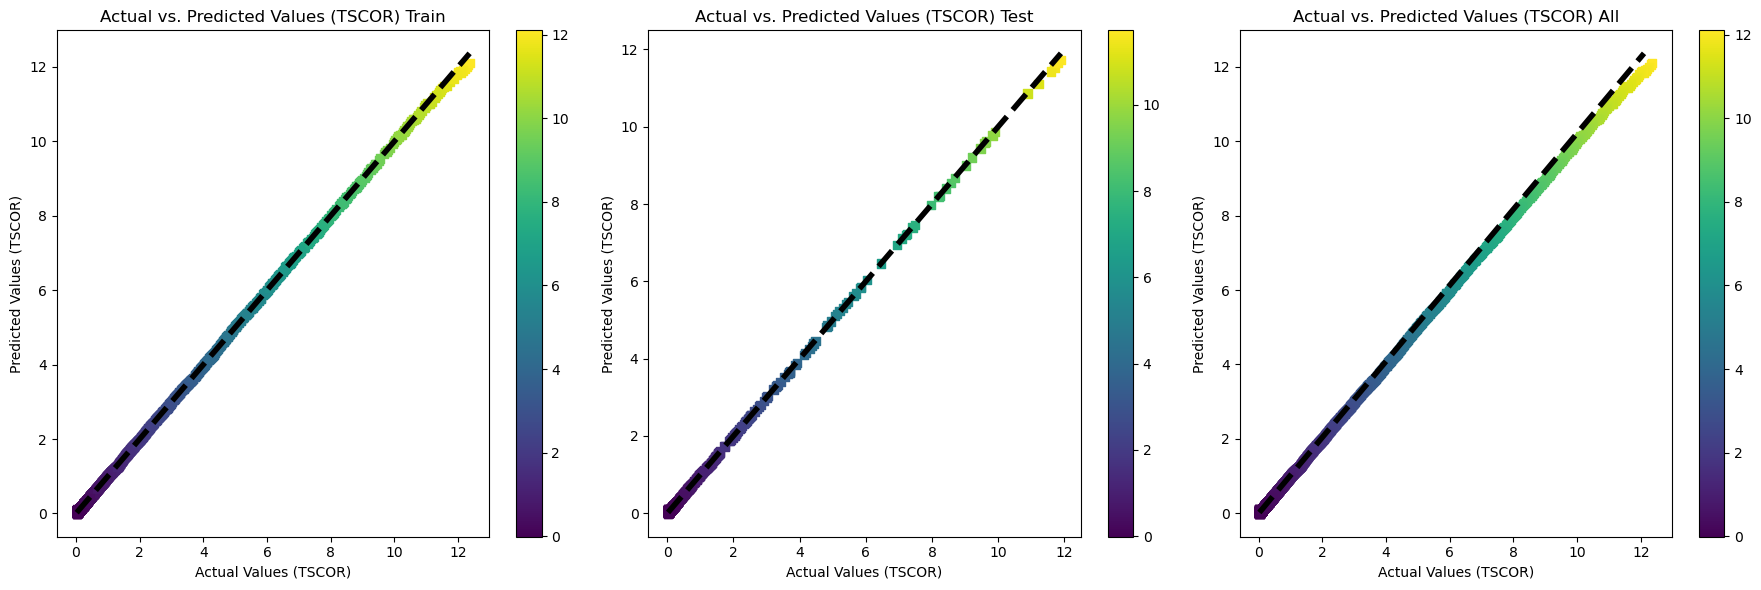

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Predict on the full dataset with the updated model
y_pred = model_regularized_dropout.predict(inputs_norm)

# Inverse transform the predicted values to get the original scale for filtered data
# Make predictions on the training and test data
y_pred_train = scaler_y.inverse_transform(model_regularized_dropout.predict(X_train))
y_pred_test = scaler_y.inverse_transform(model_regularized_dropout.predict(X_test))
y_pred_all =scaler_y.inverse_transform(y_pred) 


y_train=scaler_y.inverse_transform(y_train)
y_test=scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the predictions for both train and test sets

# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 0], y_pred_train[:, 0], c=y_pred_train[:, 0], cmap='viridis', marker='s')
plt.plot([y_train[:, 0].min(), y_train[:, 0].max()], [y_train[:, 0].min(), y_train[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 0], y_pred_test[:, 0], c=y_pred_test[:, 0], cmap='viridis', marker='s')
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 0], y_pred_all[:, 0], c=y_pred_all[:, 0], cmap='viridis', marker='s')
plt.plot([y[:, 0].min(), y_pred_all[:, 0].max()], [y[:, 0].min(), y[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

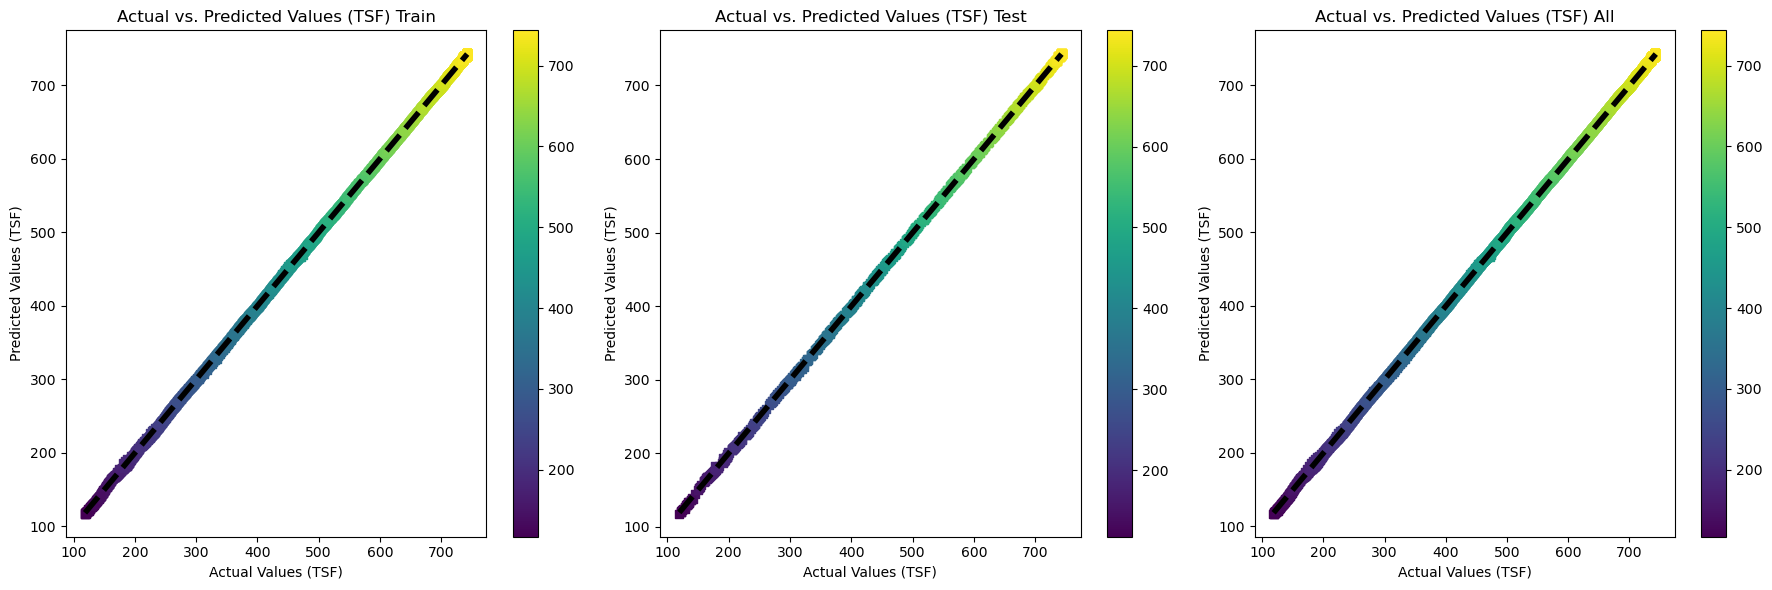

In [12]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 1], y_pred_train[:, 1], c=y_pred_train[:, 1], cmap='viridis', marker='s')
plt.plot([y_train[:, 1].min(), y_train[:, 1].max()], [y_train[:, 1].min(), y_train[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 1], y_pred_test[:, 1], c=y_pred_test[:, 1], cmap='viridis', marker='s')
plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 1], y_pred_all[:, 1], c=y_pred_all[:, 1], cmap='viridis', marker='s')
plt.plot([y[:, 1].min(), y_pred_all[:, 1].max()], [y[:, 1].min(), y[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) All')
plt.colorbar()

plt.tight_layout()
plt.show()

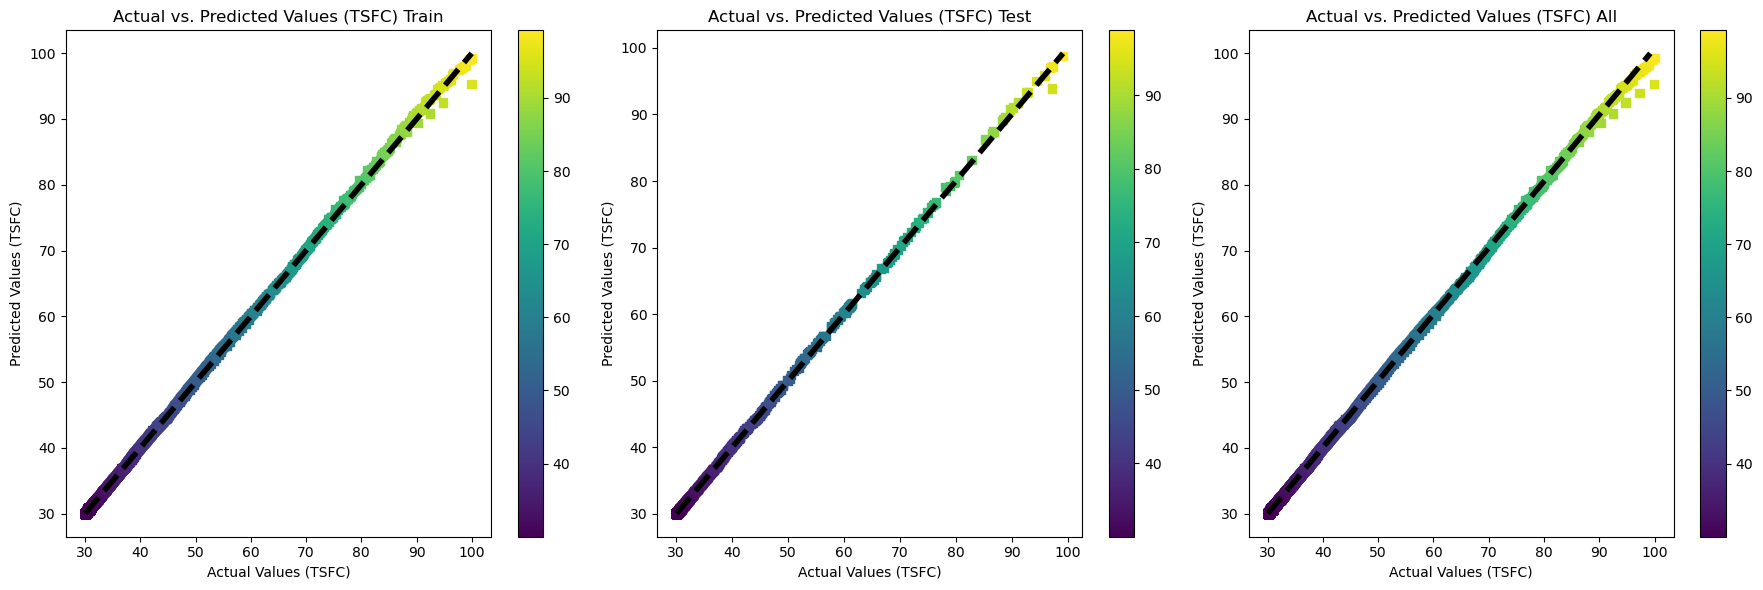

In [13]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 2], y_pred_train[:, 2], c=y_pred_train[:, 2], cmap='viridis', marker='s')
plt.plot([y_train[:, 2].min(), y_train[:, 2].max()], [y_train[:, 2].min(), y_train[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 2], y_pred_test[:, 2], c=y_pred_test[:, 2], cmap='viridis', marker='s')
plt.plot([y_test[:, 2].min(), y_test[:, 2].max()], [y_test[:, 2].min(), y_test[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 2], y_pred_all[:, 2], c=y_pred_all[:, 2], cmap='viridis', marker='s')
plt.plot([y[:, 2].min(), y_pred_all[:, 2].max()], [y[:, 2].min(), y[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

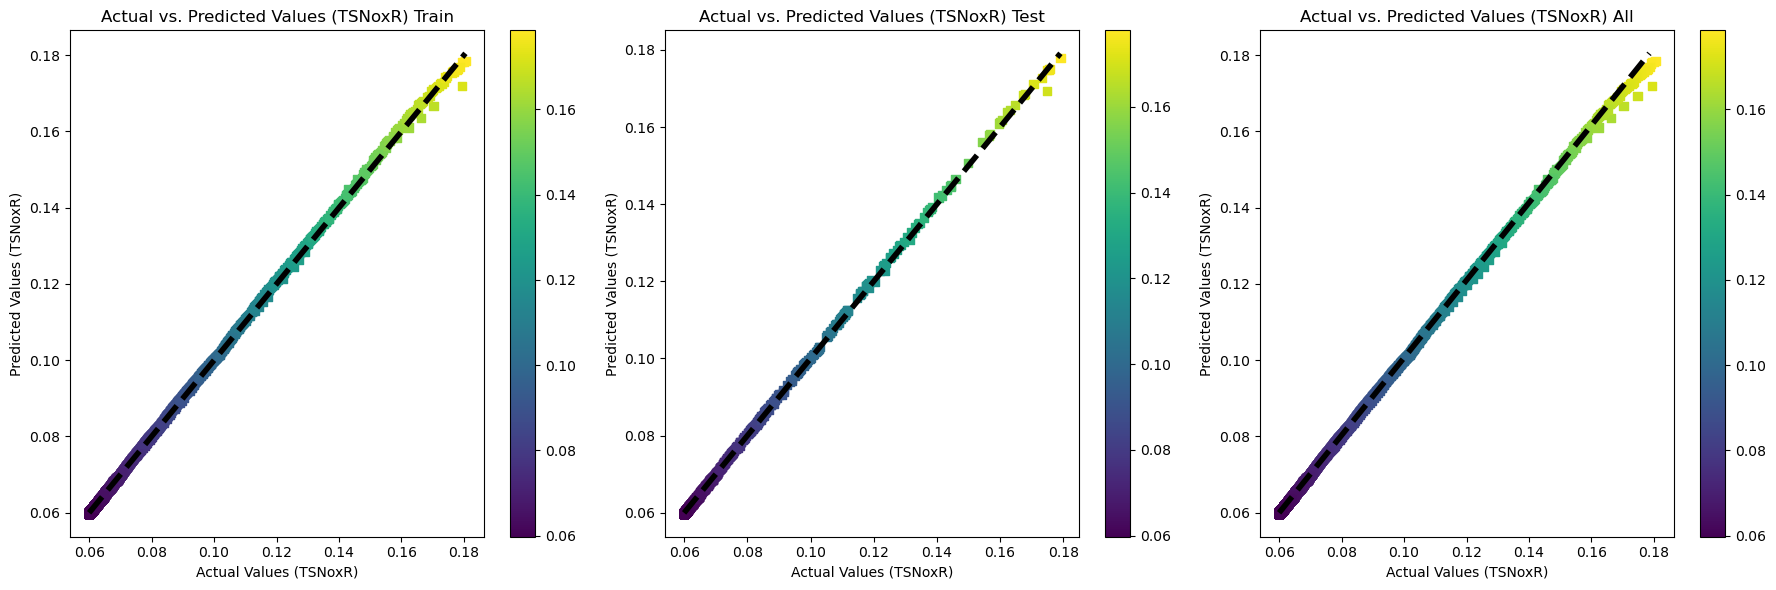

In [14]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 3], y_pred_train[:, 3], c=y_pred_train[:, 3], cmap='viridis', marker='s')
plt.plot([y_train[:, 3].min(), y_train[:, 3].max()], [y_train[:, 3].min(), y_train[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 3], y_pred_test[:, 3], c=y_pred_test[:, 3], cmap='viridis', marker='s')
plt.plot([y_test[:, 3].min(), y_test[:, 3].max()], [y_test[:, 3].min(), y_test[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 3], y_pred_all[:, 3], c=y_pred_all[:, 3], cmap='viridis', marker='s')
plt.plot([y[:, 3].min(), y_pred_all[:, 3].max()], [y[:, 3].min(), y[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

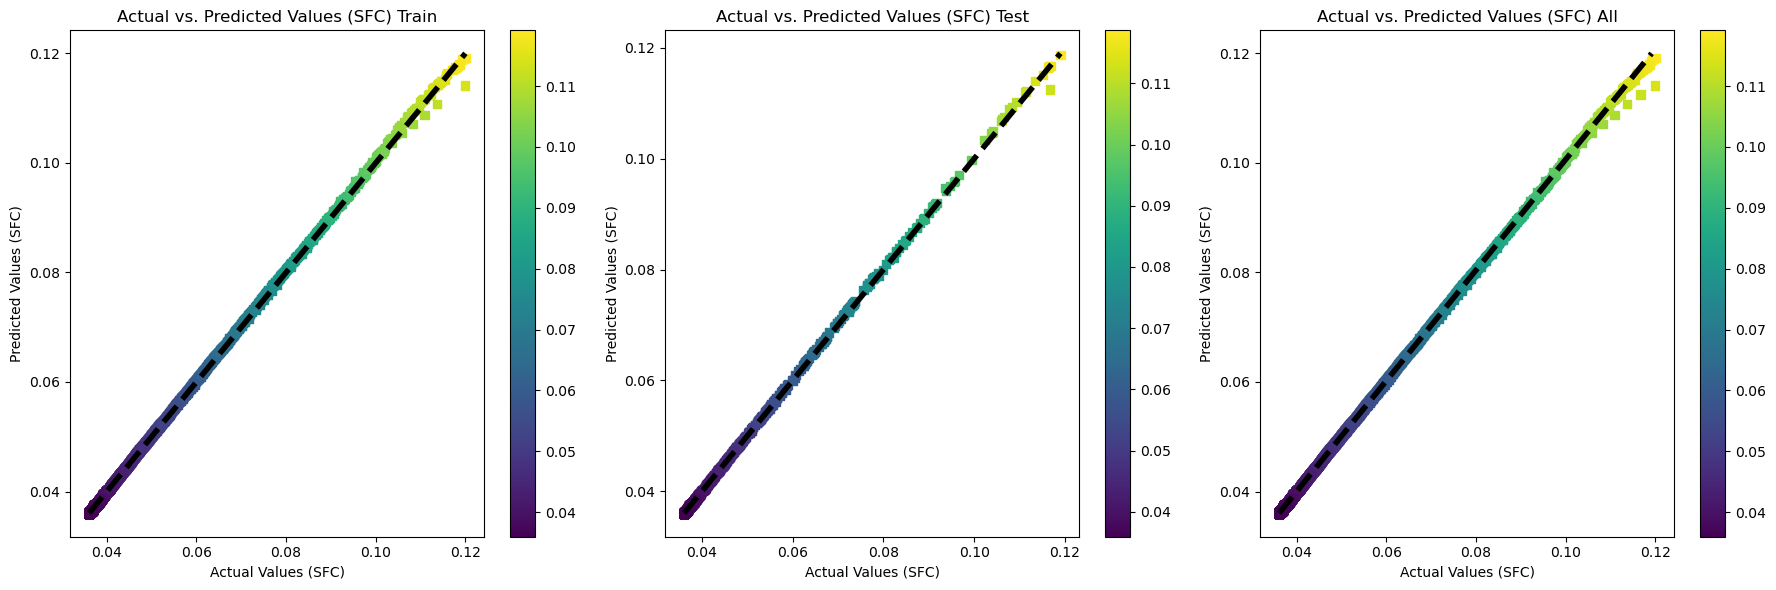

In [15]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))
#y = Data[['TSCOR','TSF','TSFC','','']].values

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 4], y_pred_train[:, 4], c=y_pred_train[:, 4], cmap='viridis', marker='s')
plt.plot([y_train[:, 4].min(), y_train[:, 4].max()], [y_train[:, 4].min(), y_train[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 4], y_pred_test[:, 4], c=y_pred_test[:, 4], cmap='viridis', marker='s')
plt.plot([y_test[:, 4].min(), y_test[:, 4].max()], [y_test[:, 4].min(), y_test[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 4], y_pred_all[:, 4], c=y_pred_all[:, 4], cmap='viridis', marker='s')
plt.plot([y[:, 4].min(), y_pred_all[:, 4].max()], [y[:, 4].min(), y[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


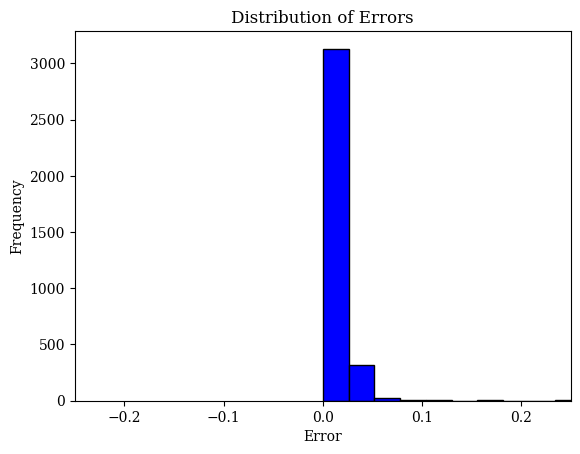

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 0]
actual_values = y[:, 0]

# Calculate the error between predicted and actual values
errors = np.abs(predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=10, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-0.25, 0.25)  # Set the x-axis range from -3 to 3

plt.show()

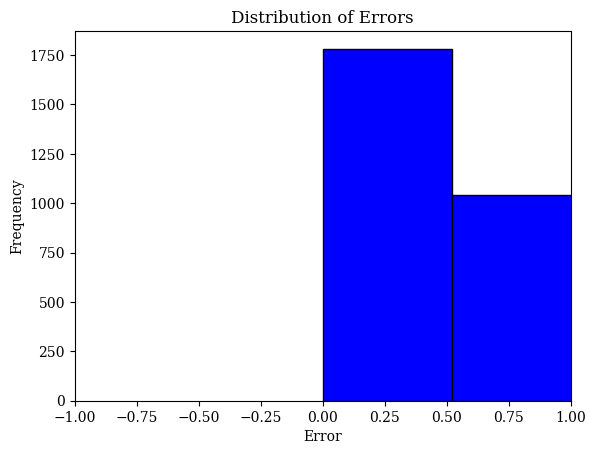

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 1]
actual_values = y[:, 1]

# Calculate the error between predicted and actual values
errors = np.abs(predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=10, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1, 1)  # Set the x-axis range from -3 to 3

plt.show()

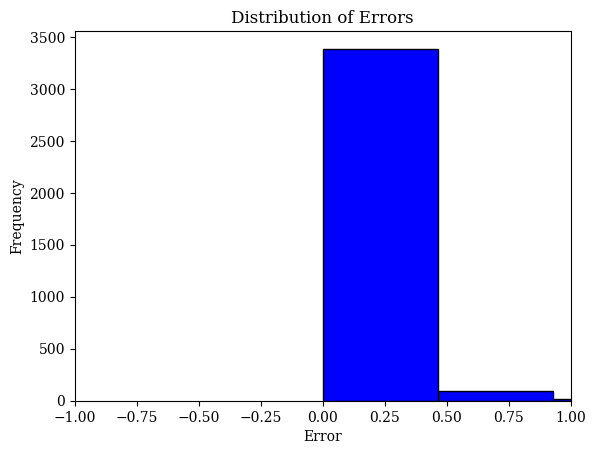

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 2]
actual_values = y[:, 2]

# Calculate the error between predicted and actual values
errors = np.abs(predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=10, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1, 1)  # Set the x-axis range from -3 to 3

plt.show()

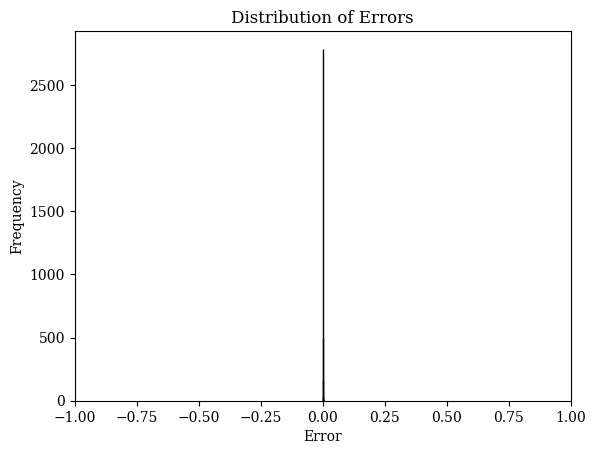

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 3]
actual_values = y[:, 3]

# Calculate the error between predicted and actual values
errors = np.abs(predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1, 1)  # Set the x-axis range from -3 to 3

plt.show()

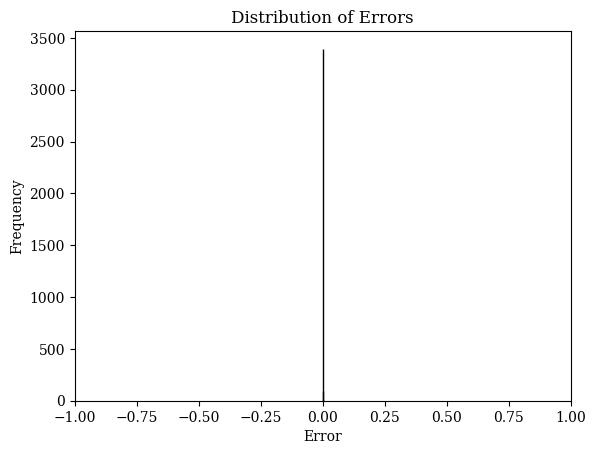

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 4]
actual_values = y[:, 4]

# Calculate the error between predicted and actual values
errors = np.abs(predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=10, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1, 1)  # Set the x-axis range from -3 to 3

plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 0], y_pred_test[:, 0])
mse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0])
rmse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0], squared=False)
mae = mean_absolute_error(y_test[:, 0], y_pred_test[:, 0])

print("Test Set Metrics:")
print("R2 Score: (TSCOR)", r2)
print("Mean Squared Error: (TSCOR)", mse)
print("Root Mean Squared Error:(TSCOR)", rmse)
print("Mean Absolute Error:(TSCOR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 0], y_pred_train[:, 0])
mse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0])
rmse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0], squared=False)
mae_train = mean_absolute_error(y_train[:, 0], y_pred_train[:, 0])

print("\nTrain Set Metrics:")
print("R2 Score: (TSCOR)", r2_train)
print("Mean Squared Error: (TSCOR)", mse_train)
print("Root Mean Squared Error: (TSCOR)", rmse_train)
print("Mean Absolute Error:(TSCOR)", mae_train)



Test Set Metrics:
R2 Score: (TSCOR) 0.9998795652062591
Mean Squared Error: (TSCOR) 0.0004578276452648602
Root Mean Squared Error:(TSCOR) 0.021396907376180798
Mean Absolute Error:(TSCOR) 0.01299200721682713

Train Set Metrics:
R2 Score: (TSCOR) 0.9999069594333175
Mean Squared Error: (TSCOR) 0.00044812796585264644
Root Mean Squared Error: (TSCOR) 0.02116903318181174
Mean Absolute Error:(TSCOR) 0.01216864749738113


In [18]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 1], y_pred_test[:, 1])
mse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1])
rmse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1], squared=False)
mae = mean_absolute_error(y_test[:, 1], y_pred_test[:, 1])

print("Test Set Metrics:")
print("R2 Score: (TSF)", r2)
print("Mean Squared Error: (TSF)", mse)
print("Root Mean Squared Error:(TSF)", rmse)
print("Mean Absolute Error:(TSF)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 1], y_pred_train[:, 1])
mse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1])
rmse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1], squared=False)
mae_train = mean_absolute_error(y_train[:, 1], y_pred_train[:, 1])

print("\nTrain Set Metrics:")
print("R2 Score: (TSF)", r2_train)
print("Mean Squared Error: (TSF)", mse_train)
print("Root Mean Squared Error: (TSF)", rmse_train)
print("Mean Absolute Error:(TSF)", mae_train)

Test Set Metrics:
R2 Score: (TSF) 0.9999724120895322
Mean Squared Error: (TSF) 0.9663894905646023
Root Mean Squared Error:(TSF) 0.9830511128952565
Mean Absolute Error:(TSF) 0.7031908935895161

Train Set Metrics:
R2 Score: (TSF) 0.9999739382119753
Mean Squared Error: (TSF) 0.9198362039788118
Root Mean Squared Error: (TSF) 0.9590809162832987
Mean Absolute Error:(TSF) 0.6718537912634245


In [19]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 3], y_pred_test[:, 3])
mse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3])
rmse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3], squared=False)
mae = mean_absolute_error(y_test[:, 3], y_pred_test[:, 3])

print("Test Set Metrics:")
print("R2 Score: (TSNoxR)", r2)
print("Mean Squared Error: (TSNoxR)", mse)
print("Root Mean Squared Error:(TSNoxR)", rmse)
print("Mean Absolute Error:(TSNoxR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 3], y_pred_train[:, 3])
mse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3])
rmse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3], squared=False)
mae_train = mean_absolute_error(y_train[:, 3], y_pred_train[:, 3])

print("\nTrain Set Metrics:")
print("R2 Score: (TSNoxR)", r2_train)
print("Mean Squared Error: (TSNoxR)", mse_train)
print("Root Mean Squared Error: (TSNoxR)", rmse_train)
print("Mean Absolute Error:(TSNoxR)", mae_train)

Test Set Metrics:
R2 Score: (TSNoxR) 0.9996810863466471
Mean Squared Error: (TSNoxR) 1.8192355987587603e-07
Root Mean Squared Error:(TSNoxR) 0.00042652498153786494
Mean Absolute Error:(TSNoxR) 0.00027328120835327387

Train Set Metrics:
R2 Score: (TSNoxR) 0.9996893323697383
Mean Squared Error: (TSNoxR) 1.6630374043194883e-07
Root Mean Squared Error: (TSNoxR) 0.00040780355617864447
Mean Absolute Error:(TSNoxR) 0.0002671201143538756


In [20]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 4], y_pred_test[:, 4])
mse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4])
rmse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4], squared=False)
mae = mean_absolute_error(y_test[:, 4], y_pred_test[:, 4])

print("Test Set Metrics:")
print("R2 Score: (TSFCC)", r2)
print("Mean Squared Error: (TSFCC)", mse)
print("Root Mean Squared Error:(TSFCC)", rmse)
print("Mean Absolute Error:(TSFCC)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 4], y_pred_train[:, 4])
mse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4])
rmse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4], squared=False)
mae_train = mean_absolute_error(y_train[:, 4], y_pred_train[:, 4])

print("\nTrain Set Metrics:")
print("R2 Score: (TSFCC)", r2_train)
print("Mean Squared Error: (TSFCC)", mse_train)
print("Root Mean Squared Error: (TSFCC)", rmse_train)
print("Mean Absolute Error:(TSFCC)", mae_train)



Test Set Metrics:
R2 Score: (TSFCC) 0.9997074419785419
Mean Squared Error: (TSFCC) 8.499268835975062e-08
Root Mean Squared Error:(TSFCC) 0.0002915350551130183
Mean Absolute Error:(TSFCC) 0.00017420265562184033

Train Set Metrics:
R2 Score: (TSFCC) 0.9997292983999917
Mean Squared Error: (TSFCC) 7.429290488227686e-08
Root Mean Squared Error: (TSFCC) 0.0002725672483668514
Mean Absolute Error:(TSFCC) 0.00017212105282368958


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

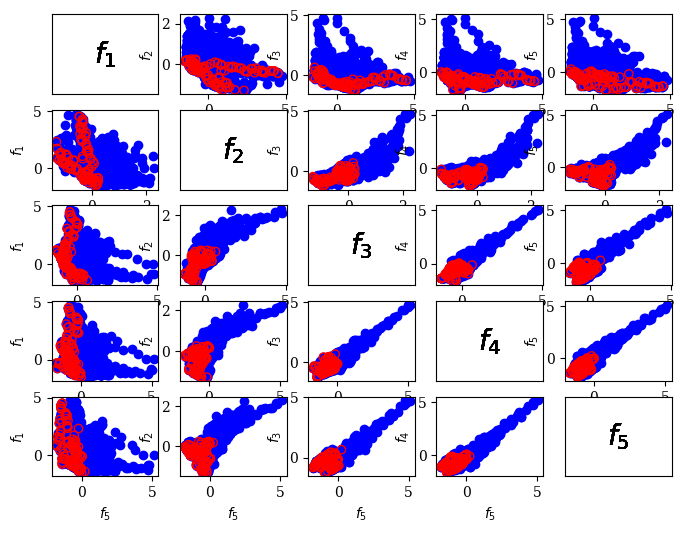

In [21]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.evaluator import Evaluator
from pymoo.core.problem import Problem
from pymoo.core.termination import NoTermination
from pymoo.visualization.scatter import Scatter
from pymoo.problems.static import StaticProblem


# Define the multi-objective function using the trained neural network
def multi_objective_function(x):
    inputs_test_norm = scaler_x.transform(np.array(x).reshape(1, -1))
    #y_pred = scaler_y.inverse_transform(model_regularized_dropout.predict(inputs_test_norm))
    y_pred = model_regularized_dropout.predict(inputs_test_norm)
    return (y_pred[0, 0], -y_pred[0, 1],y_pred[0, 2],y_pred[0, 3],y_pred[0, 4])

problem = Problem(n_var=6, n_obj=5, n_constr=0, xl=[0.01, 0.01, 1.5, 1.5, 1.5, 1600], xu=[0.3,0.3,8, 3.5, 7, 2175])

# Create the algorithm object
algorithm = NSGA2(pop_size=100)

# Let the algorithm object never terminate and let the loop control it
termination = NoTermination()

# Create an algorithm object that never terminates
algorithm.setup(problem, termination=termination)

# Fix the random seed manually
np.random.seed(1)

# Initialize plot
plot = Scatter()

# Until the algorithm has not terminated
for n_gen in range(10):
    # Ask the algorithm for the next solution to be evaluated
    pop = algorithm.ask()

    # Get the design space values of the algorithm
    X = pop.get("X")

    # Evaluate objectives using the multi-objective function
    F = np.array([multi_objective_function(x) for x in X])
    static = StaticProblem(problem, F=F)
    Evaluator().eval(static, pop)

    # Returned the evaluated individuals which have been evaluated or even modified
    algorithm.tell(infills=pop)

    # Update plot with current generation
    plot.add(pop.get("F"), color="blue")

# Add Pareto front to plot
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)

# Obtain the result objective from the algorithm
res = algorithm.result()

# Calculate a hash to show that all executions end with the same result
print("hash", res.F.sum())

# Retrieve the optimal inputs from the optimization result
optimal_inputs = res.X
print("Optimal Inputs:")
for input_values in optimal_inputs:
    print(input_values)

# Add final result to plot
plot.add(res.F, facecolor="none", edgecolor="red")

# Show plot
plot.show()


In [22]:

# Add Pareto front to plot
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)

for input_values in optimal_inputs:
    print(input_values)

# Add final result to plot
plot.add(res.F, facecolor="none", edgecolor="red")

# Show plot
plot.show()

[1.95469651e-02 1.08726704e-02 6.70483970e+00 3.32852922e+00
 2.66237391e+00 2.15636675e+03]
[7.68098431e-02 5.15481447e-02 7.35850484e+00 2.94538185e+00
 6.86107204e+00 1.96604753e+03]
[1.69405527e-01 2.63555008e-02 7.69960742e+00 1.53348582e+00
 6.17315385e+00 1.96570762e+03]
[1.04065113e-01 2.40168236e-01 6.99061245e+00 2.57688119e+00
 1.65480066e+00 2.16192027e+03]
[3.51867693e-02 1.76063927e-02 1.62837474e+00 1.63087492e+00
 1.87590340e+00 1.66079369e+03]
[1.13003192e-02 3.02207382e-02 1.60301793e+00 1.63086609e+00
 1.89042157e+00 2.15464817e+03]
[2.56884641e-02 3.47644907e-02 1.79578445e+00 3.05429443e+00
 2.64838841e+00 2.16310982e+03]
[3.54405947e-02 1.75990446e-02 5.54744627e+00 1.63254864e+00
 1.50863353e+00 1.60653461e+03]
[3.54405947e-02 1.76959384e-02 5.28922098e+00 3.13881859e+00
 1.50863353e+00 1.60653461e+03]
[7.67591204e-02 1.20198460e-01 7.44957674e+00 1.99949295e+00
 1.83455874e+00 2.12998141e+03]
[6.15974157e-02 1.06703376e-02 1.79440945e+00 1.53950592e+00
 1.888192

In [23]:
import pandas as pd

# Assuming res.F contains the optimal outputs and res.X contains the optimal inputs
optimal_inputs = res.X
optimal_outputs = scaler_y.inverse_transform(np.abs(res.F)) 
df_optimal_inputs = pd.DataFrame(optimal_inputs, columns=['BPR1', 'BPR2', 'PR_HPC', 'PR_IPC', 'PR_LPC', 'TIT'])
df_optimal_outputs = pd.DataFrame(optimal_outputs, columns=['TSCOR', 'TSF', 'TSFC', 'TSNoxR', 'SFC'])
Optimaldata=pd.concat([df_optimal_inputs,df_optimal_outputs],axis=1)

# Write the combined optimal data to an Excel file
Optimaldata.to_excel("Optimalsbypass.xlsx") 



In [24]:
res.F

array([[-3.03808749e-01, -2.35329300e-01, -5.34254253e-01,
        -1.69460833e+00, -1.38619351e+00],
       [-1.09144926e+00,  2.43010193e-01, -2.56003708e-01,
        -8.42334330e-02, -7.45681673e-02],
       [-1.52453339e+00,  1.35493711e-01, -1.43977195e-01,
         4.02994826e-02,  1.05797797e-02],
       [-1.42340946e+00,  1.80867419e-01,  6.52116776e-01,
        -1.37271047e-01,  2.30922639e-01],
       [ 2.31305909e+00, -1.29991615e+00, -4.87229615e-01,
        -1.43620640e-01, -2.15833485e-01],
       [ 4.50692797e+00, -4.48193878e-01, -4.37208176e-01,
        -8.48026454e-01, -1.38196647e+00],
       [ 8.66124451e-01, -3.09475884e-02, -8.27784061e-01,
        -1.13447833e+00, -1.78357160e+00],
       [ 1.21282029e+00, -9.36951876e-01, -1.25775015e+00,
        -1.40709925e+00, -9.21741962e-01],
       [ 9.20509934e-01, -8.65638554e-01, -1.14923334e+00,
        -1.32356560e+00, -7.38534451e-01],
       [-1.00669587e+00, -2.85855085e-01,  4.38489169e-01,
        -6.03145123e-01

In [25]:
model_regularized_dropout.predict(scaler_x.transform(optimal_inputs))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[-3.0380893e-01,  2.3532943e-01, -5.3425419e-01, -1.6946088e+00,
        -1.3861938e+00],
       [-1.0914493e+00, -2.4301028e-01, -2.5600317e-01, -8.4233575e-02,
        -7.4567549e-02],
       [-1.5245339e+00, -1.3549393e-01, -1.4397718e-01,  4.0299602e-02,
         1.0580070e-02],
       [-1.4234096e+00, -1.8086742e-01,  6.5211666e-01, -1.3727087e-01,
         2.3092282e-01],
       [ 2.3130589e+00,  1.2999160e+00, -4.8722944e-01, -1.4362031e-01,
        -2.1583331e-01],
       [ 4.5069280e+00,  4.4819400e-01, -4.3720821e-01, -8.4802634e-01,
        -1.3819662e+00],
       [ 8.6612415e-01,  3.0947264e-02, -8.2778430e-01, -1.1344779e+00,
        -1.7835721e+00],
       [ 1.2128206e+00,  9.3695176e-01, -1.2577500e+00, -1.4070990e+00,
        -9.2174208e-01],
       [ 9.2050982e-01,  8.6563843e-01, -1.1492331e+00, -1.3235655e+00,
        -7.3853493e-01],
       [-1.0066956e+00,  2.8585505e-01,  4.3848905e-01, -6.0314494e-01,
        -5.0821757e-01],
       [ 3.1823766e+00,  3.399

In [26]:
optimal_inputs

array([[1.95469651e-02, 1.08726704e-02, 6.70483970e+00, 3.32852922e+00,
        2.66237391e+00, 2.15636675e+03],
       [7.68098431e-02, 5.15481447e-02, 7.35850484e+00, 2.94538185e+00,
        6.86107204e+00, 1.96604753e+03],
       [1.69405527e-01, 2.63555008e-02, 7.69960742e+00, 1.53348582e+00,
        6.17315385e+00, 1.96570762e+03],
       [1.04065113e-01, 2.40168236e-01, 6.99061245e+00, 2.57688119e+00,
        1.65480066e+00, 2.16192027e+03],
       [3.51867693e-02, 1.76063927e-02, 1.62837474e+00, 1.63087492e+00,
        1.87590340e+00, 1.66079369e+03],
       [1.13003192e-02, 3.02207382e-02, 1.60301793e+00, 1.63086609e+00,
        1.89042157e+00, 2.15464817e+03],
       [2.56884641e-02, 3.47644907e-02, 1.79578445e+00, 3.05429443e+00,
        2.64838841e+00, 2.16310982e+03],
       [3.54405947e-02, 1.75990446e-02, 5.54744627e+00, 1.63254864e+00,
        1.50863353e+00, 1.60653461e+03],
       [3.54405947e-02, 1.76959384e-02, 5.28922098e+00, 3.13881859e+00,
        1.50863353e+00, 